Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/819.0 kB ? eta -:--:--
     ------------------------ ------------- 524.3/819.0 kB 5.6 MB/s eta 0:00:01
     -------------------------------------- 819.0/819.0 kB 7.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp312-cp312-win_amd64.whl size=402328 sha256=ebc7d3378c54ffaa30e5f71fb1d49f74929428b4c66a089c4cf08524278b9c45
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\17\4d\c3\c6d5d563c1bf8146d059d63be3678abc2f2801fba0aaf5f0b8
Successfully built scikit-learn-extra
Note: you

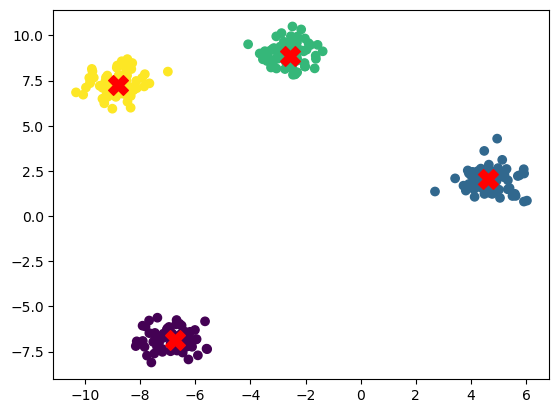

In [3]:
# Install the missing package
%pip install scikit-learn-extra

from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate sample data
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)
# Apply K-Medoids
kmedoids = KMedoids(n_clusters=4, random_state=42)
kmedoids.fit(data)
labels = kmedoids.labels_

# Visualize
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(data[kmedoids.medoid_indices_, 0], data[kmedoids.medoid_indices_, 1], s=200, c='red', marker='X')
plt.show()


In [4]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs

def hopkins_statistic(X, sample_size=None):
    if sample_size is None:
        sample_size = int(0.1 * len(X))  # 10% of data
    
    random_indices = np.random.choice(range(len(X)), sample_size, replace=False)
    random_sample = X[random_indices]
    
    # Generate random uniform points within the range of the dataset
    uniform_random = np.random.uniform(np.min(X, axis=0), np.max(X, axis=0), (sample_size, X.shape[1]))
    
    nn = NearestNeighbors(n_neighbors=1).fit(X)
    u_distances, _ = nn.kneighbors(uniform_random, n_neighbors=1)
    x_distances, _ = nn.kneighbors(random_sample, n_neighbors=1)
    
    hopkins_score = np.sum(u_distances) / (np.sum(u_distances) + np.sum(x_distances))
    return hopkins_score

# Generate sample data
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Compute Hopkins statistic
hopkins_score = hopkins_statistic(data)
print(f"Hopkins Statistic: {hopkins_score}")


Hopkins Statistic: 1.0
